<a href="https://colab.research.google.com/github/gusair/gusair/blob/master/An%C3%A1lise_de_Dados_do_Airbnb_Nova_Iorque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Augusto Jesus, projeto nº1 em Ciência de Dados**
*curso da [sigmoidal.ai](https://sigmoidal.ai/)* 

---

# Análise de Dados do Airbnb - Nova Iorque

O [Airbnb](https://www.airbnb.com.br/) é uma das startups de maior valor de mercado atualmente, sendo a a empresa que revolucionou a hotelaria mundial com sua plataforma online, onde pessoas podem disponibilizar quartos ou casas para viajantes com preços geralmente mais em conta a de hotéis comuns. 

<center><img width=20% src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Fundada 12 anos atrás por 3 amigos universitarios de São Francisco, hoje a empresa vale cerca de 30 bilhões de dolares, sendo que maior rede de hotéis do mundo, a Hilton, vale 23 bilhões dolares. A "Air, bed and breakfast" (origem do nome Airbnb) é uma das maiores empresas do mundo no contexto atual. 

***O Airbnb passa por uma crise devido a pandemia, não trataremos do assunto nesse notebook já que não convém com o objetivo desse projeto, caso queira saber mais acesse [aqui](https://computerworld.com.br/2020/07/01/pandemia-de-covid-19-quase-quebra-airbnb/).***



**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova Iorque, e ver quais insights podem ser extraídos a partir de dados brutos oferecidos pela própria startup.**








## **Obtenção dos Dados**

Uma das iniciativas da startup é disponibilizar dados da plataforma, sobre algumas das principais cidades. Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Ciência de Dados*, como é o caso do presente projeto.

Para esta análise exploratória inicial, será utilizado apenas o seguinte arquivo:
* `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*

In [2]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# importar arquivo listings.csv para Data Frame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-06-08/visualisations/listings.csv")



## Análise dos Dados

Nesta seção, vamos entender a forma estrutural dos dados apresentados e procurar ter um entendimento inicial sobre o que eles querem dizer, por isso o seguinte dicionário.




**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365


### **Questão 1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para iniciar, vamos descobrir quantas entradas nosso *dataset* possui, além de identificar os tipos de cada coluna. 

*Essa lista é uma versão resumida disponibilizada pelo Airbnb. Existe uma versão completa que pode ser encontrada no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), na aba Get the Data*. 

In [5]:
# identificar o volume de dados no DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do Dataset

display(df.dtypes)


Entradas:	 49530
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Questão 2. Qual a porcentagem de valores ausentes no *dataset*?**

Um *Dataset* é um conjunto de dados, e se existem valores ausentes nesse conjunto pode gerar alguns erros na hora de analisar, por isso, veremos agora os valores ausentes no nosso conjunto de dados. 

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.228528
last_review                       0.228528
name                              0.000363
host_name                         0.000121
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Nosso *Dataset* está em "boa forma", não esta perfeito, mas apresenta poquissímos casos de ausência de valores. Apenas 4 colunas estão caducas de dados:

* As variáveis `reviews_per_month`e `last_revie` possuem valores nulos em pouco mais de 20% das linhas.
* As variáveis `host_name` e `availability_365`apresentam 3% e 1% de dados faltantes, respectivamente.

### **Questão 3. Qual o tipo de distribuição das variáveis**


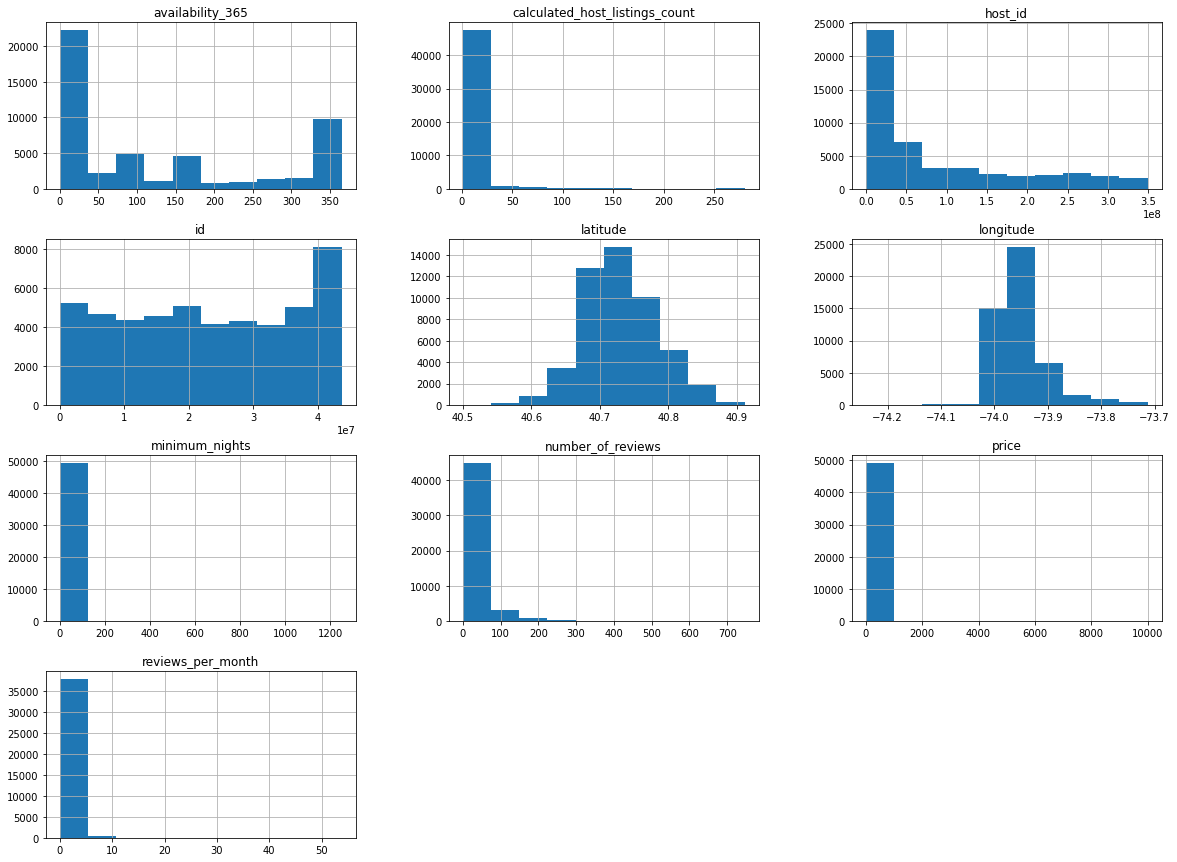

In [7]:
# plotar o histograma das variveis númericas 

df.hist(bins=10, figsize=(20,15));

### **Questão 4. Há *outliers* presentes?**

Observando os histogramas plotados acima é possível perceber indícios de *outliers*. Os gráficos representando: `minimum_nights` e `price`, provavelmentes contém dados que prejudicam a análise final.

In [8]:
# ver resumo estastístico das variáveis numéricas 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,49530.000000,49530.000000,49530.000000,38211.000000,49530.000000,49530.000000
mean,162.643872,8.191540,23.867515,1.008095,6.233030,126.666848
std,419.312316,21.974833,48.245823,1.345213,25.485293,142.381428
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,2.000000,1.000000,0.150000,1.000000,0.000000
50%,101.000000,3.000000,5.000000,0.450000,1.000000,79.000000
75%,175.000000,6.000000,23.000000,1.420000,2.000000,267.000000
max,10000.000000,1250.000000,746.000000,53.800000,280.000000,365.000000


Observando o resumo estatístico acima, é conclusivo que os valores de `price` não possui *outliers* que  prejudiquem tanto a análise, os valores maiores são compreensíveis, e apesar de altos, não chegam ao absurdo, ainda mais em Nova Iorque. 

Os valores em `minimum_nights`podem prejudicar bastante a análise, o valor máximo presente é de 1250 dias, sendo que 75% das hospedagens são de até 6 dias. É muito improvável uma hospedagem com essa quantidade de dias. 

#### **Boxplot para mimimum_nights**

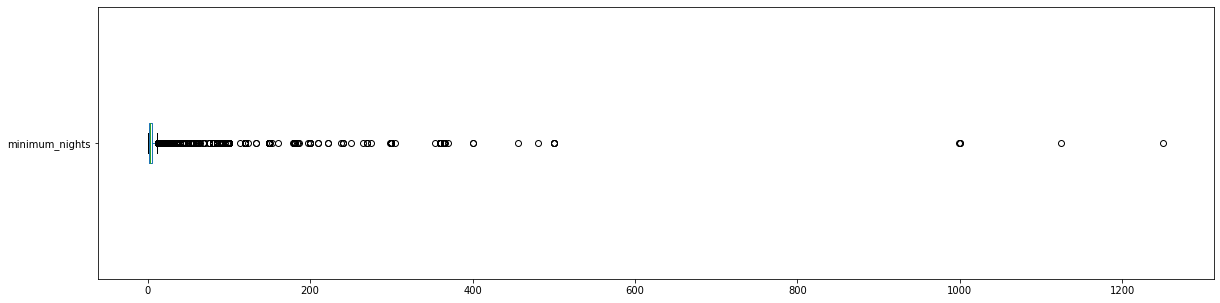

minimun_nights:valores acima de 20 dias
6909 entradas
13.9491%


In [9]:
# minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(20, 5))
plt.show()

# Ver quantidade valores acima de 20 dias para minimum_nights
print("minimun_nights:valores acima de 20 dias")
print("{} entradas".format(len(df[df.minimum_nights > 20])))
print("{:.4f}%".format((len(df[df.minimum_nights > 20]) / df.shape[0])*100))



Os valores mais altos estão realmente fora do comum, como previsto.

#### **Boxplot para price (verificando se realmente está dentro dos padrões)**

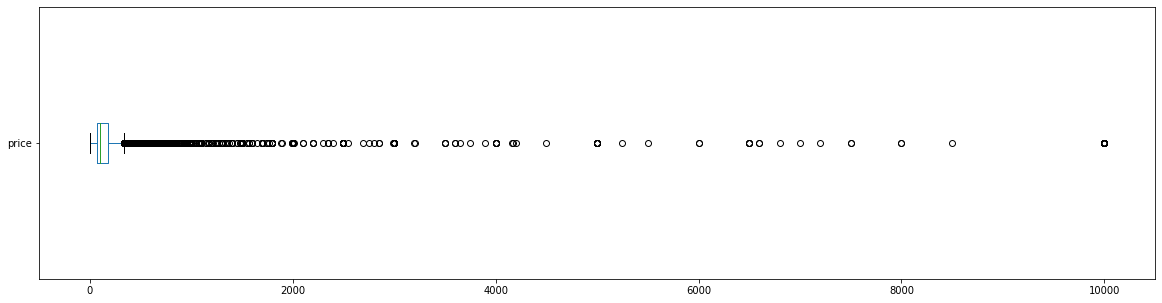

In [10]:
# price

df.price.plot(kind='box', vert=False, figsize=(20, 5));
plt.show()

A distribuição dos valores, como esperado, não está muito espaçada. os valores mais altos são, portanto, aceitáveis.


#### **Histogramas sem *outliers***

Uma vez que identificamos *outliers* nas variável  `minimum_nights`, limparemos o *DataFrame* delas e vamos plotar novamente os histogramas.

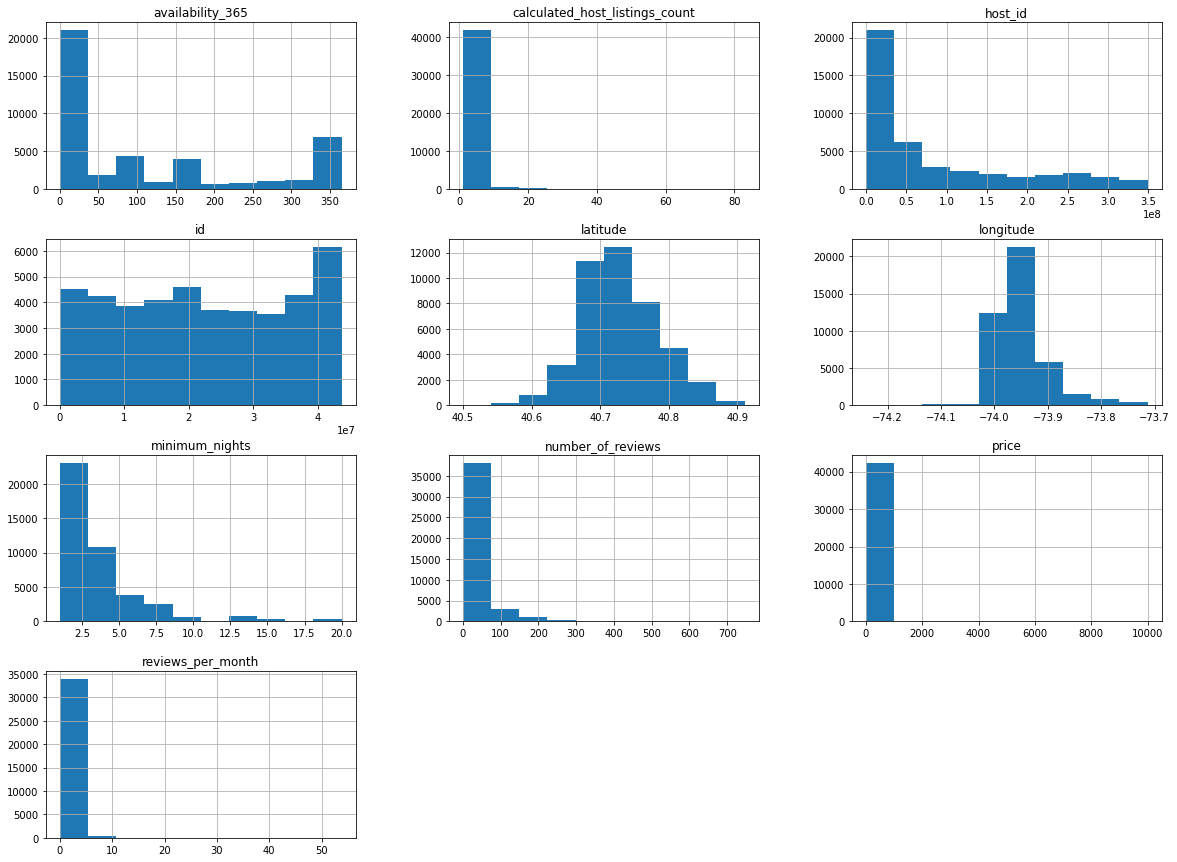

In [11]:
# remover os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 20].index, axis=0, inplace=True)

# remover `neighbourhood_group`, já que está vazio

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar histogramas para as variáveis númericas (sem os outliers)

df_clean.hist(bins=10, figsize=(20, 15));

### **Questão 3. Qual a correlação existentes entre as variáveis?**

Neste ponto, vamos buscar por relações ou semelhanças entre as variáveis, a partir da função de coeficiente de correlação que vai nos indicar a intesidade de correlação entre as variáveis. Para isso, primeiro estabeleceremos uma *Matrix de Correlação* e depois geraremos um *heatmap* a partir da matrix pré-estabelecida.


In [12]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.028775,-0.036876,-0.012155,0.047997,0.057759
minimum_nights,-0.028775,1.000000,-0.097145,-0.159899,-0.026582,-0.049006
number_of_reviews,-0.036876,-0.097145,1.000000,0.719379,0.008781,0.262877
reviews_per_month,-0.012155,-0.159899,0.719379,1.000000,0.056800,0.272422
calculated_host_listings_count,0.047997,-0.026582,0.008781,0.056800,1.000000,0.229543
availability_365,0.057759,-0.049006,0.262877,0.272422,0.229543,1.000000


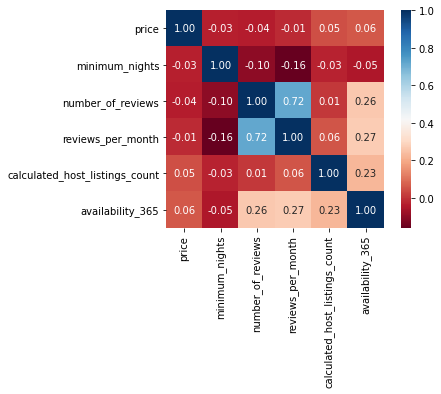

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Questão 5. Qual o tipo de imóvel mais alugado na plataforma Airbnb em Nova Iorque?**


O Airbnb possibilita o aluguel de apartamentos, casas inteiras, de um único quarto e até mesmo meio quarto (dividir com outras pessoas). Agora, vamos descobrir em qual dessas opções é mais recorrente o aluguel na cidade de Nova Iorque. 

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


Entire home/apt    21062
Private room       20201
Shared room          947
Hotel room           411
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.494170
Private room       0.473968
Shared room        0.022219
Hotel room         0.009643
Name: room_type, dtype: float64

Metade dos imóveis alugados são apartmaentos, e mais 47% sãop quartos privados. Quartos de hotéis e quartos compartilhados equivalem juntos a cerca de 3% dos aluguéis em Nova Iorque.

### **Qual a localidade mais cara de Nova Iorque?**



Veremos agora, quais as localidades mais caras para se hospedar pelo Airbnb em Nova Iorque.

In [26]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Woodrow              2350.000000
Manhattan Beach       997.363636
Fort Wadsworth        800.000000
Theater District      628.451613
Midtown               564.976452
Prince's Bay          506.666667
Sea Gate              369.076923
Tribeca               366.326531
Riverdale             359.454545
Flatiron District     332.812500
Name: price, dtype: float64

Fazendo uma rápida pesquisa sobre a cidade de Nova Iorque e comparando, é possível chegar a hipótese, de que algumas dessas amostras são não-representativas, ou seja, não condizem com a realidade. Sendo assim, vamos fazer uma rápida análise com os seguintes bairros: Woodrow e Fort , Midtown e Theater District. Tendo em vista que os dois primeiros são amostras não-representativas, uma vez que são bairros poucos conhecidos e não muito visitados em Nova Iorque, o contrario dos dois últimos. 

In [31]:
# Ver quantidade de imóveis em Woodrow

print(df_clean[df_clean.neighbourhood == "Woodrow"].shape)

df_clean[df_clean.neighbourhood == "Woodrow"]

(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2652,1798271,Spacious center hall colonial,9430973,Donna,Woodrow,40.53884,-74.19826,Entire home/apt,700,7,0,NaN,NaN,1,0
47568,42949093,S.I. home,341475072,Kareem,Woodrow,40.53865,-74.19631,Entire home/apt,4000,1,0,NaN,NaN,1,252


In [36]:
# Ver quantidade de imóveis em Fort Wadsworth 

print(df_clean[df_clean.neighbourhood == "Fort Wadsworth"].shape)

df_clean[df_clean.neighbourhood == "Fort Wadsworth"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21823,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Fort Wadsworth,40.59546,-74.06092,Entire home/apt,800,7,0,NaN,NaN,5,329


Como suspeitava os bairros Woodrow e Fort Wadsworth são dados não representativos, uma vez que juntos possuem apenas 3 entradas no total, comparando esses 3 com as as mais de 40000 totais, estes bairros atrapalham a análise final uma vez que não condiz com a realidade.

In [32]:
# Ver quantidade de imóveis em Midtown

print(df_clean[df_clean.neighbourhood == "Midtown"].shape)

df_clean[df_clean.neighbourhood == "Midtown"]

(1274, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.753620,-73.983770,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
377,137671,Park Ave 1Br - heart of Manhattan,673090,Svetlana,Midtown,40.744590,-73.981470,Entire home/apt,180,4,29,2020-02-22,0.37,1,200
532,225297,Quiet sunny studio Midtown,1173599,Gaya,Midtown,40.742670,-73.985690,Entire home/apt,95,5,5,2020-02-14,0.05,1,0
558,233662,Large Sunny Luxe Prvt Room/Midtown,1223568,Tiffany,Midtown,40.755480,-73.968050,Private room,110,2,66,2019-12-11,0.63,1,270
809,328040,"Awesome views, Central location",1676487,Robyn,Midtown,40.750230,-73.982930,Entire home/apt,299,10,29,2020-03-27,0.36,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49499,43691025,Lovely Private Room | Midtown East | Close to UN,163626113,Alexis,Midtown,40.752800,-73.967480,Private room,100,2,0,NaN,NaN,3,68
49508,43698832,New Year's Eve in NYC at Midtown 45 Manhattan,36786627,Barbara,Midtown,40.752880,-73.973280,Entire home/apt,550,3,0,NaN,NaN,1,8
49516,43701283,A+ Location Superior Studio (Double & Single Bed),348619646,Nomad,Midtown,40.747610,-73.988380,Entire home/apt,199,1,0,NaN,NaN,4,216
49523,43702545,A+ Location City Studio (Double & Bunk Double ...,348619646,Nomad,Midtown,40.747453,-73.988046,Entire home/apt,69,1,0,NaN,NaN,4,77


In [33]:
# Ver quantidade de imóveis em Theater District

print(df_clean[df_clean.neighbourhood == "Theater District"].shape)

df_clean[df_clean.neighbourhood == "Theater District"]

(217, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
498,205043,Modern Condo in Midtown,1007558,Welcome To My Place,Theater District,40.75895,-73.98830,Private room,150,1,366,2020-03-15,6.37,1,167
514,212178,1 Bedroom Pre War apt,1094178,Jeremy,Theater District,40.75877,-73.98863,Entire home/apt,230,2,201,2020-02-27,1.89,1,183
663,265145,Studio sublet in Hell's kitchen,1390947,Akiko,Theater District,40.76217,-73.98411,Entire home/apt,200,5,8,2015-01-08,0.08,1,0
918,424667,Luxury room + En-suite bath in Times Sq/Midtown W,2111060,Jj,Theater District,40.75962,-73.98420,Private room,99,1,138,2020-02-15,1.41,2,364
2008,1080766,SUMMER Special Price Times Square,5944682,Maja & Pierre,Theater District,40.75964,-73.98534,Private room,139,1,267,2020-02-11,3.08,1,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49266,43601592,DOM-NYC 3B - Your Times Square Retreat in NYC,346766570,Artur,Theater District,40.75830,-73.98211,Shared room,140,1,0,NaN,NaN,6,284
49286,43610825,DOM-NYC 3D Tranquility - Funky Luxury in NYC,346766570,Artur,Theater District,40.75747,-73.98243,Private room,185,1,0,NaN,NaN,6,295
49371,43640716,Luxury 1BR fully furnished near Times Square,348485510,Alex,Theater District,40.76279,-73.98479,Entire home/apt,90,14,0,NaN,NaN,1,90
49406,43661796,DOM-NYC 4B Your Personal Haven on Times Square,346766570,Artur,Theater District,40.75856,-73.98246,Shared room,145,1,0,NaN,NaN,6,265


Vamos observar agora, a disposisão dos imóveis no terrtório da ciodade, considerando a latitude e alongitude desses.

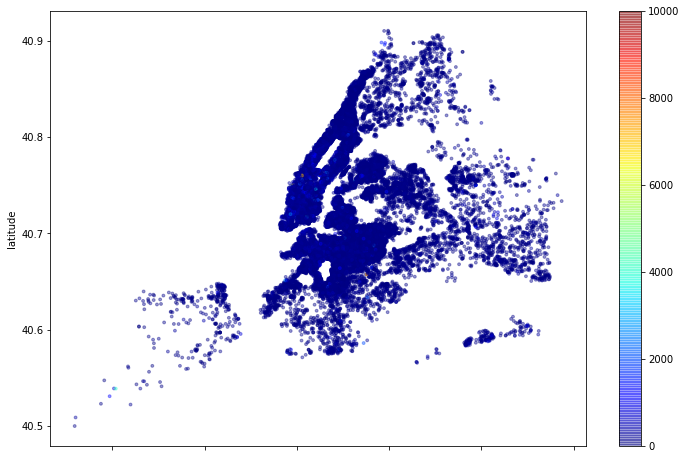

In [41]:
# plotar os imóveis pela lagitude e longitude
              
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Conclusões**

Esse *dataset* é resumido e foi utilizado apenas para uma análise inicial, esta que foi realizada com a finalidade de apredizado e prática, ou seja, tudo bem superficial.

Já considerados os limites desse projeto, faremos algumas observações. 
* Em algumas variáveis há presença de *outliers* que podem prejudicar na análise final. 
* Notou-se também que em alguns bairros da cidade há pouco imóveis disponíveis, podendo acarretar distorções na análise dos dados.

